### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.base import clone
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

### Classifiers

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifiers = {
    "LR":  LogisticRegression(max_iter=1000, random_state=42),
    "DT":  DecisionTreeClassifier(random_state=42),
    "RF":  RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
}

### DATASET UPLOAD

In [3]:
import pandas as pd

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
import pandas as pd

df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
import pandas as pd

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv")
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


### X and Y for Each Dataset

In [7]:
import pandas as pd

# --- HEART (target column = 'target') ---
heart = pd.read_csv("heart.csv")
X_heart = heart.drop(columns=["target"])
y_heart = heart["target"]   # 0/1 already

# --- ADULT (target column = 'income', make <=50K = 0, >50K = 1) ---
adult = pd.read_csv("adult.csv")
adult = adult.replace("?", pd.NA).dropna()  # simple cleanup

# One-hot encode categoricals
adult_X = adult.drop(columns=["income"])
adult_X = pd.get_dummies(adult_X, drop_first=True)
adult_y = adult["income"].map({"<=50K": 0, ">50K": 1})

X_adult = adult_X
y_adult = adult_y

# --- WINEQUALITY-RED (target = quality, binarize: >=7 = 1, else 0) ---
wine = pd.read_csv("winequality-red.csv")
y_wine = (wine["quality"] >= 7).astype(int)
X_wine = wine.drop(columns=["quality"])

# --- BANK (target column = 'y', yes=1, no=0) ---
bank = pd.read_csv("bank-additional-full.csv", sep=';')
bank = bank.replace("unknown", pd.NA).dropna()

bank_X = bank.drop(columns=["y"])
bank_X = pd.get_dummies(bank_X, drop_first=True)
bank_y = bank["y"].map({"no": 0, "yes": 1})

X_bank = bank_X
y_bank = bank_y

In [8]:
datasets = {
    "Heart": (X_heart, y_heart),
    "Adult": (X_adult, y_adult),
    "WineRed": (X_wine, y_wine),
    "Bank": (X_bank, y_bank)
}

### Hyperparameters

In [9]:
# === FAST Hyperparameter Tuning (NO SVM) ===
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

cv_results = []

# -------- Base models (default settings) --------
base_models = {
    "LR":  LogisticRegression(max_iter=1000, n_jobs=-1),
    "DT":  DecisionTreeClassifier(),
    "RF":  RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# -------- Small & efficient hyperparameter search spaces --------
param_distributions = {
    "LR": {
        "C": [0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"],   # fastest for numeric datasets
    },

    "DT": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
    },

    "RF": {
        "n_estimators": [50, 100, 200],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "max_features": ["sqrt", "log2"],
    },

    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "p": [1, 2],   # Manhattan vs Euclidean
    }
}

# ====== Choose datasets YOU want to tune on ======
datasets_to_tune = {
    "Heart": (X_heart, y_heart),
    "WineRed": (X_wine, y_wine),
    # If adding Bank:
    "Bank": (X_bank, y_bank)
}

# ====== Hyperparameter Search Loop ======
for ds_name, (X, y) in datasets_to_tune.items():
    print(f"\n=== Tuning on {ds_name} ===")

    for clf_name, base_clf in base_models.items():
        print(f"  → Tuning {clf_name}...")

        search = RandomizedSearchCV(
            estimator=base_clf,
            param_distributions=param_distributions[clf_name],
            n_iter=5,                # FAST — was 10
            scoring="accuracy",
            cv=3,
            random_state=42,
            n_jobs=-1
        )

        search.fit(X, y)
        best_model = search.best_estimator_

        # Re-evaluate best model with CV for reporting
        cv_acc = cross_val_score(best_model, X, y, cv=3, scoring="accuracy").mean()
        cv_f1  = cross_val_score(best_model, X, y, cv=3, scoring="f1").mean()

        cv_results.append({
            "Dataset": ds_name,
            "Classifier": clf_name,
            "BestParams": search.best_params_,
            "CV_Accuracy": cv_acc,
            "CV_F1": cv_f1
        })

# Convert to DataFrame + Save
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.to_csv("cv_results.csv", index=False)

cv_results_df


=== Tuning on Heart ===
  → Tuning LR...


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  → Tuning DT...
  → Tuning RF...
  → Tuning KNN...

=== Tuning on WineRed ===
  → Tuning LR...


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


  → Tuning DT...
  → Tuning RF...
  → Tuning KNN...

=== Tuning on Bank ===
  → Tuning LR...


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in

  → Tuning DT...
  → Tuning RF...
  → Tuning KNN...


,Dataset,Classifier,BestParams,CV_Accuracy,CV_F1
0,Heart,LR,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}",0.842897,0.855130
1,Heart,DT,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.970735,0.973522
2,Heart,RF,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.980478,0.981251
3,Heart,KNN,"{'weights': 'distance', 'p': 1, 'n_neighbors': 9}",0.964875,0.965598
4,WineRed,LR,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}",0.879300,0.415323
5,WineRed,DT,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.864916,0.388491
6,WineRed,RF,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.879925,0.375486
7,WineRed,KNN,"{'weights': 'distance', 'p': 1, 'n_neighbors': 9}",0.857411,0.226189
8,Bank,LR,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}",0.635153,0.138554
9,Bank,DT,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.615046,0.107826


### Splits

In [10]:
# (name, test_size)
splits = [
    ("20_80", 0.80),
    ("50_50", 0.50),
    ("80_20", 0.20)
]

In [11]:
print("HEART:", y_heart.value_counts())
print("ADULT:", y_adult.value_counts())
print("WINE:",  y_wine.value_counts())
print("BANK:",  y_bank.value_counts())

HEART: target
1    526
0    499
Name: count, dtype: int64
ADULT: income
0    22654
1     7508
Name: count, dtype: int64
WINE: quality
0    1382
1     217
Name: count, dtype: int64
BANK: y
0    26629
1     3859
Name: count, dtype: int64


In [13]:
from sklearn.metrics import accuracy_score, f1_score

results = []

for ds_name, (X, y) in datasets.items():
    for split_name, test_size in splits:
        # train/test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            random_state=42,
            stratify=y
        )

        for clf_name, clf in classifiers.items():
            model = clf
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            f1  = f1_score(y_test, y_pred)

            results.append({
                "Dataset": ds_name,
                "Split": split_name,
                "Classifier": clf_name,
                "Accuracy": acc,
                "F1": f1
            })

results_df = pd.DataFrame(results)
results_df


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Dataset,Split,Classifier,Accuracy,F1
0,Heart,20_80,LR,0.824390,0.834862
1,Heart,20_80,DT,0.803659,0.807186
2,Heart,20_80,RF,0.889024,0.893816
3,Heart,20_80,KNN,0.651220,0.670507
4,Heart,20_80,SVM,0.656098,0.704403
5,Heart,50_50,LR,0.838207,0.852050
6,Heart,50_50,DT,0.961014,0.961538
7,Heart,50_50,RF,0.966862,0.967985
8,Heart,50_50,KNN,0.703704,0.708812
9,Heart,50_50,SVM,0.699805,0.723022


In [14]:
results_df.to_csv("results_full.csv", index=False)

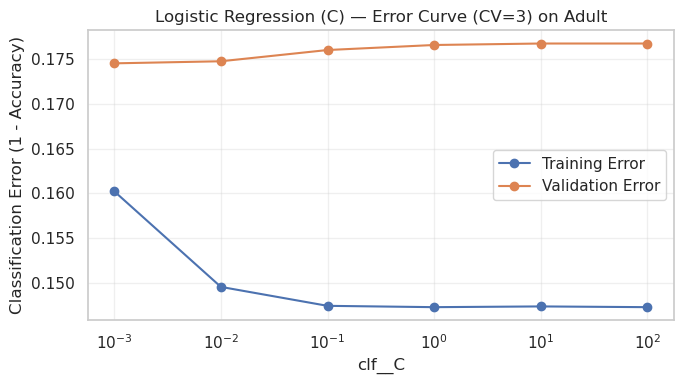

/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


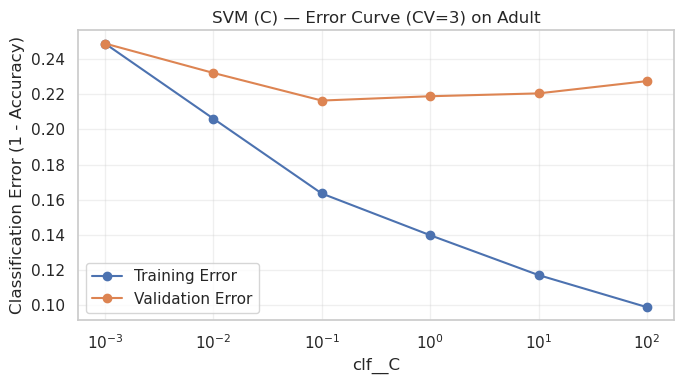

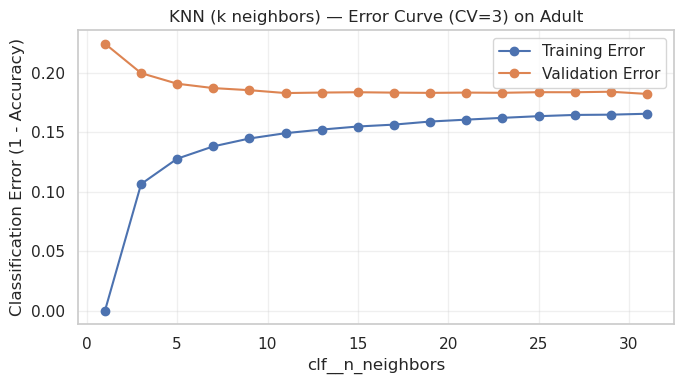

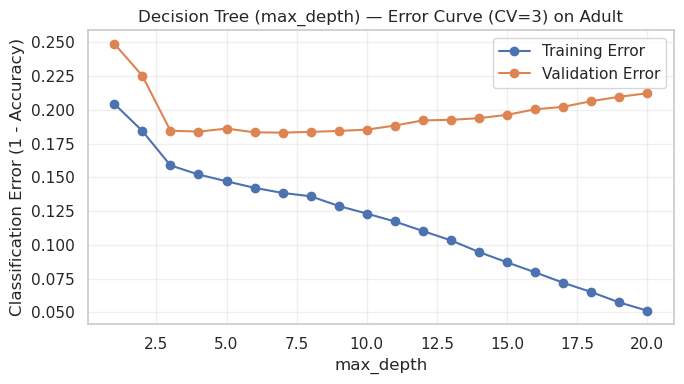

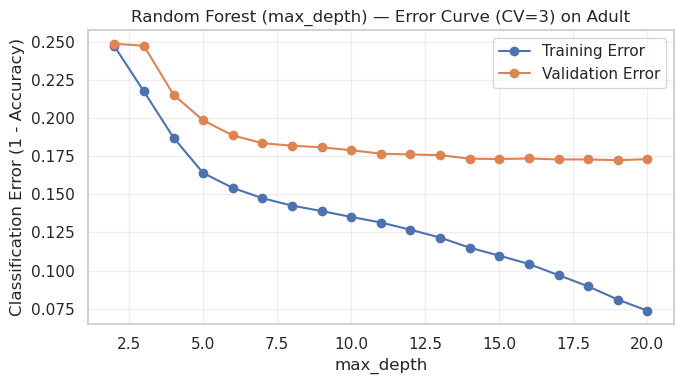

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# -------------------------
# Choose which dataset to plot curves for
# -------------------------
DATASET_NAME = "Adult"   # change to "Bank", "Heart", "WineRed" if you want
X, y = datasets[DATASET_NAME]

# -------------------------
# Define models + hyperparameter sweeps
# (1 curve per classifier, as required by rubric)
# -------------------------
configs = [
    {
        "name": "Logistic Regression (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "SVM (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(kernel="rbf"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "KNN (k neighbors)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "param_name": "clf__n_neighbors",
        "param_range": np.arange(1, 32, 2),   # odd k: 1..31
        "xscale": "linear"
    },
    {
        "name": "Decision Tree (max_depth)",
        "estimator": DecisionTreeClassifier(random_state=0),
        "param_name": "max_depth",
        "param_range": np.arange(1, 21),      # depth: 1..20
        "xscale": "linear"
    },
    {
        "name": "Random Forest (max_depth)",
        "estimator": RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1),
        "param_name": "max_depth",
        "param_range": np.arange(2, 21),      # depth: 2..20
        "xscale": "linear"
    }
]

# -------------------------
# Plot curves
# -------------------------
for cfg in configs:
    train_scores, val_scores = validation_curve(
        cfg["estimator"],
        X, y,
        param_name=cfg["param_name"],
        param_range=cfg["param_range"],
        cv=3,
        scoring="accuracy",
        n_jobs=-1
    )

    train_err = 1 - train_scores.mean(axis=1)
    val_err   = 1 - val_scores.mean(axis=1)

    plt.figure(figsize=(7, 4))
    if cfg["xscale"] == "log":
        plt.semilogx(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.semilogx(cfg["param_range"], val_err, marker="o", label="Validation Error")
    else:
        plt.plot(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.plot(cfg["param_range"], val_err, marker="o", label="Validation Error")

    plt.xlabel(cfg["param_name"])
    plt.ylabel("Classification Error (1 - Accuracy)")
    plt.title(f"{cfg['name']} — Error Curve (CV=3) on {DATASET_NAME}")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

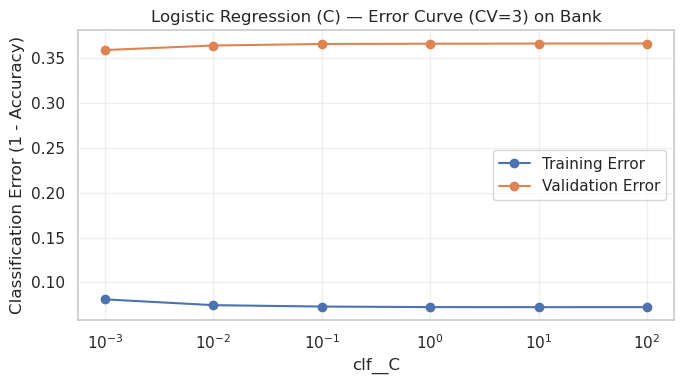

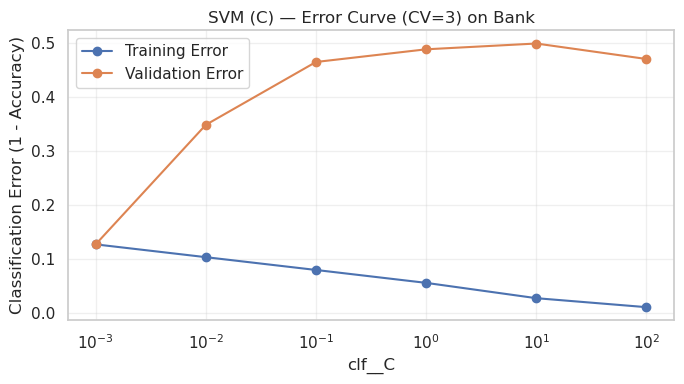

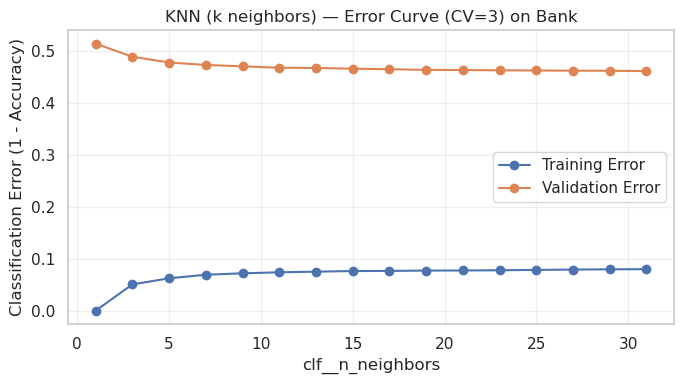

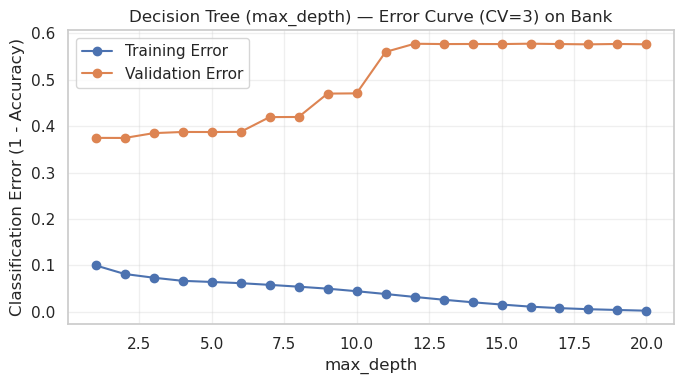

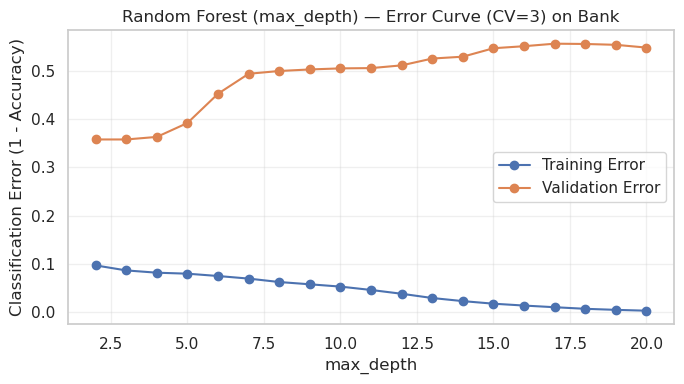

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# -------------------------
# Choose which dataset to plot curves for
# -------------------------
DATASET_NAME = "Bank"   # change to "Bank", "Heart", "WineRed" if you want
X, y = datasets[DATASET_NAME]

# -------------------------
# Define models + hyperparameter sweeps
# (1 curve per classifier, as required by rubric)
# -------------------------
configs = [
    {
        "name": "Logistic Regression (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "SVM (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(kernel="rbf"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "KNN (k neighbors)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "param_name": "clf__n_neighbors",
        "param_range": np.arange(1, 32, 2),   # odd k: 1..31
        "xscale": "linear"
    },
    {
        "name": "Decision Tree (max_depth)",
        "estimator": DecisionTreeClassifier(random_state=0),
        "param_name": "max_depth",
        "param_range": np.arange(1, 21),      # depth: 1..20
        "xscale": "linear"
    },
    {
        "name": "Random Forest (max_depth)",
        "estimator": RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1),
        "param_name": "max_depth",
        "param_range": np.arange(2, 21),      # depth: 2..20
        "xscale": "linear"
    }
]

# -------------------------
# Plot curves
# -------------------------
for cfg in configs:
    train_scores, val_scores = validation_curve(
        cfg["estimator"],
        X, y,
        param_name=cfg["param_name"],
        param_range=cfg["param_range"],
        cv=3,
        scoring="accuracy",
        n_jobs=-1
    )

    train_err = 1 - train_scores.mean(axis=1)
    val_err   = 1 - val_scores.mean(axis=1)

    plt.figure(figsize=(7, 4))
    if cfg["xscale"] == "log":
        plt.semilogx(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.semilogx(cfg["param_range"], val_err, marker="o", label="Validation Error")
    else:
        plt.plot(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.plot(cfg["param_range"], val_err, marker="o", label="Validation Error")

    plt.xlabel(cfg["param_name"])
    plt.ylabel("Classification Error (1 - Accuracy)")
    plt.title(f"{cfg['name']} — Error Curve (CV=3) on {DATASET_NAME}")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

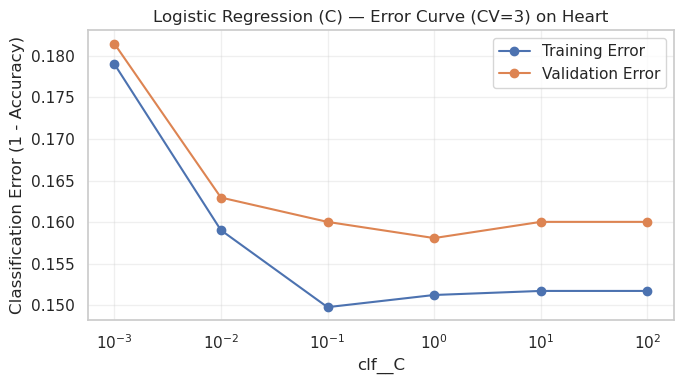

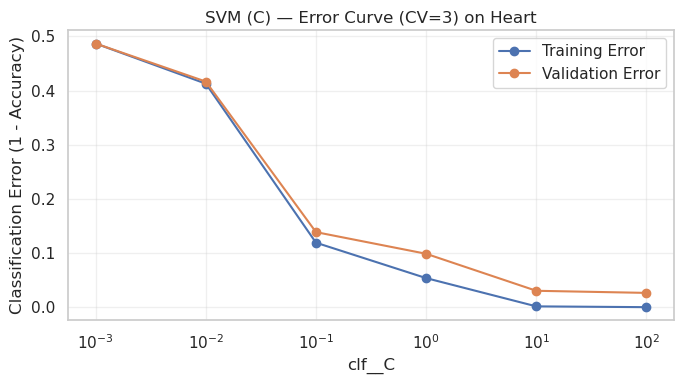

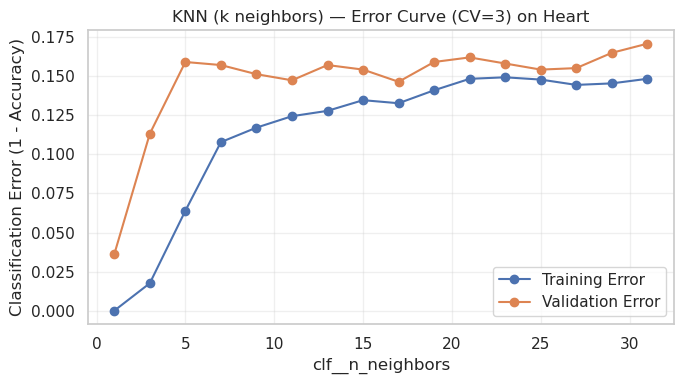

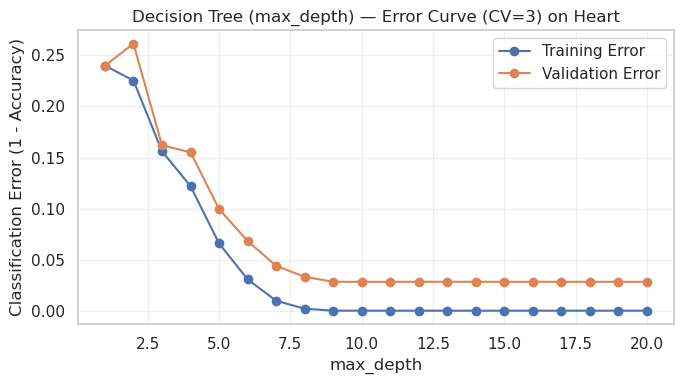

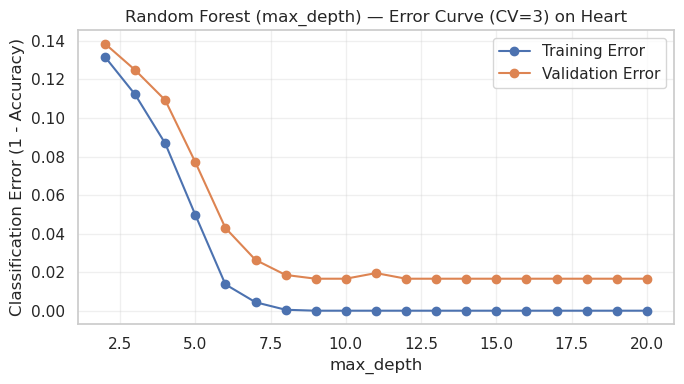

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# -------------------------
# Choose which dataset to plot curves for
# -------------------------
DATASET_NAME = "Heart"   # change to "Bank", "Heart", "WineRed" if you want
X, y = datasets[DATASET_NAME]

# -------------------------
# Define models + hyperparameter sweeps
# (1 curve per classifier, as required by rubric)
# -------------------------
configs = [
    {
        "name": "Logistic Regression (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "SVM (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(kernel="rbf"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "KNN (k neighbors)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "param_name": "clf__n_neighbors",
        "param_range": np.arange(1, 32, 2),   # odd k: 1..31
        "xscale": "linear"
    },
    {
        "name": "Decision Tree (max_depth)",
        "estimator": DecisionTreeClassifier(random_state=0),
        "param_name": "max_depth",
        "param_range": np.arange(1, 21),      # depth: 1..20
        "xscale": "linear"
    },
    {
        "name": "Random Forest (max_depth)",
        "estimator": RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1),
        "param_name": "max_depth",
        "param_range": np.arange(2, 21),      # depth: 2..20
        "xscale": "linear"
    }
]

# -------------------------
# Plot curves
# -------------------------
for cfg in configs:
    train_scores, val_scores = validation_curve(
        cfg["estimator"],
        X, y,
        param_name=cfg["param_name"],
        param_range=cfg["param_range"],
        cv=3,
        scoring="accuracy",
        n_jobs=-1
    )

    train_err = 1 - train_scores.mean(axis=1)
    val_err   = 1 - val_scores.mean(axis=1)

    plt.figure(figsize=(7, 4))
    if cfg["xscale"] == "log":
        plt.semilogx(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.semilogx(cfg["param_range"], val_err, marker="o", label="Validation Error")
    else:
        plt.plot(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.plot(cfg["param_range"], val_err, marker="o", label="Validation Error")

    plt.xlabel(cfg["param_name"])
    plt.ylabel("Classification Error (1 - Accuracy)")
    plt.title(f"{cfg['name']} — Error Curve (CV=3) on {DATASET_NAME}")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

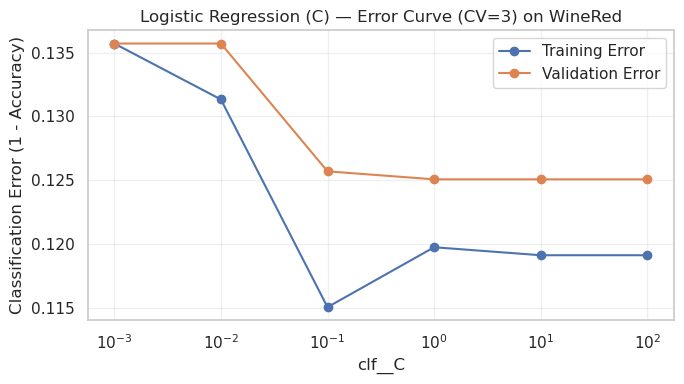

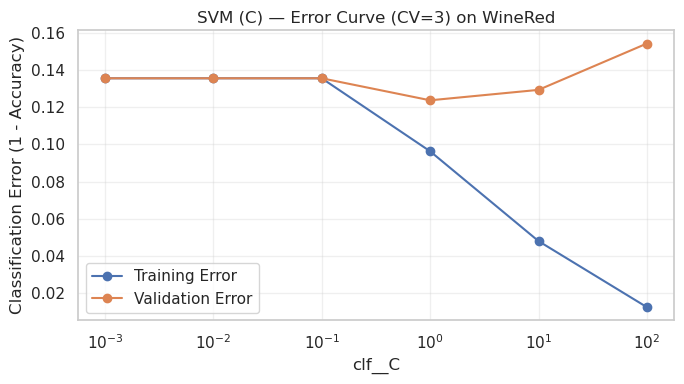

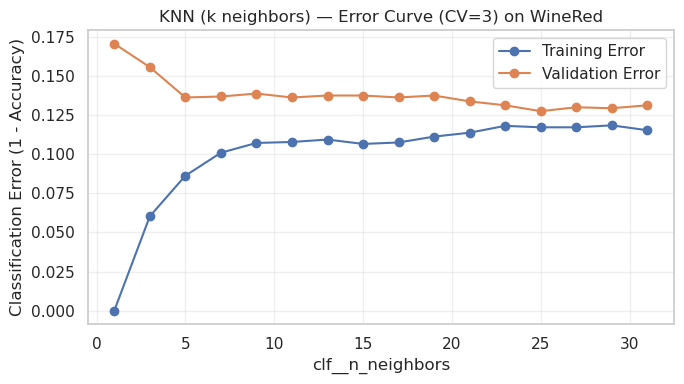

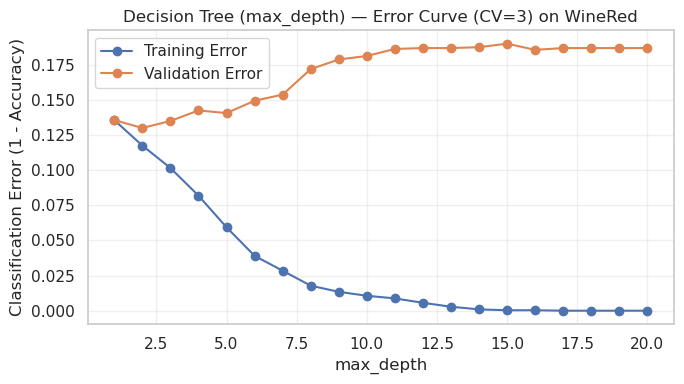

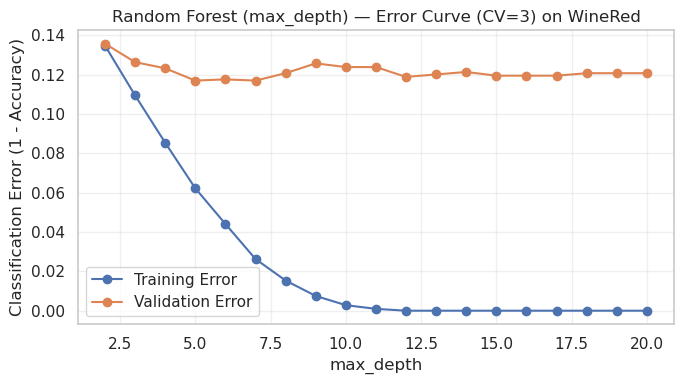

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# -------------------------
# Choose which dataset to plot curves for
# -------------------------
DATASET_NAME = "WineRed"   # change to "Bank", "Heart", "WineRed" if you want
X, y = datasets[DATASET_NAME]

# -------------------------
# Define models + hyperparameter sweeps
# (1 curve per classifier, as required by rubric)
# -------------------------
configs = [
    {
        "name": "Logistic Regression (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "SVM (C)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(kernel="rbf"))
        ]),
        "param_name": "clf__C",
        "param_range": np.logspace(-3, 2, 6),
        "xscale": "log"
    },
    {
        "name": "KNN (k neighbors)",
        "estimator": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "param_name": "clf__n_neighbors",
        "param_range": np.arange(1, 32, 2),   # odd k: 1..31
        "xscale": "linear"
    },
    {
        "name": "Decision Tree (max_depth)",
        "estimator": DecisionTreeClassifier(random_state=0),
        "param_name": "max_depth",
        "param_range": np.arange(1, 21),      # depth: 1..20
        "xscale": "linear"
    },
    {
        "name": "Random Forest (max_depth)",
        "estimator": RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1),
        "param_name": "max_depth",
        "param_range": np.arange(2, 21),      # depth: 2..20
        "xscale": "linear"
    }
]

# -------------------------
# Plot curves
# -------------------------
for cfg in configs:
    train_scores, val_scores = validation_curve(
        cfg["estimator"],
        X, y,
        param_name=cfg["param_name"],
        param_range=cfg["param_range"],
        cv=3,
        scoring="accuracy",
        n_jobs=-1
    )

    train_err = 1 - train_scores.mean(axis=1)
    val_err   = 1 - val_scores.mean(axis=1)

    plt.figure(figsize=(7, 4))
    if cfg["xscale"] == "log":
        plt.semilogx(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.semilogx(cfg["param_range"], val_err, marker="o", label="Validation Error")
    else:
        plt.plot(cfg["param_range"], train_err, marker="o", label="Training Error")
        plt.plot(cfg["param_range"], val_err, marker="o", label="Validation Error")

    plt.xlabel(cfg["param_name"])
    plt.ylabel("Classification Error (1 - Accuracy)")
    plt.title(f"{cfg['name']} — Error Curve (CV=3) on {DATASET_NAME}")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


### Independent Trials

In [15]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

import numpy as np
import pandas as pd

# ----- 3 independent trials for each dataset / classifier / split -----

n_trials = 3
trial_seeds = [0, 1, 2]   # you can change these if you want, but keep them fixed

three_trial_results = []

for ds_name, (X, y) in datasets.items():
    print(f"=== Dataset: {ds_name} ===")
    for split_name, test_size in splits:
        print(f"  Split: {split_name}")
        for clf_name, base_clf in classifiers.items():
            print(f"    Classifier: {clf_name}")

            train_accs = []
            val_accs   = []
            test_accs  = []
            test_f1s   = []

            for seed in trial_seeds:
                # 1) Outer train/test split
                X_train_full, X_test, y_train_full, y_test = train_test_split(
                    X, y,
                    test_size=test_size,
                    random_state=seed,
                    stratify=y
                )

                # 2) Inner train/validation split (20% of *training* for val)
                X_train, X_val, y_train, y_val = train_test_split(
                    X_train_full, y_train_full,
                    test_size=0.2,
                    random_state=seed,
                    stratify=y_train_full
                )

                # 3) Fresh clone of the classifier for this trial
                clf = clone(base_clf)
                clf.fit(X_train, y_train)

                # 4) Accuracies + F1
                y_train_pred = clf.predict(X_train)
                y_val_pred   = clf.predict(X_val)
                y_test_pred  = clf.predict(X_test)

                train_acc = accuracy_score(y_train, y_train_pred)
                val_acc   = accuracy_score(y_val,   y_val_pred)
                test_acc  = accuracy_score(y_test,  y_test_pred)
                test_f1   = f1_score(y_test, y_test_pred)

                train_accs.append(train_acc)
                val_accs.append(val_acc)
                test_accs.append(test_acc)
                test_f1s.append(test_f1)
                

            # 5) Aggregate over the 3 trials
            three_trial_results.append({
                "Dataset":     ds_name,
                "Split":       split_name,
                "Classifier":  clf_name,
                "TrainAcc_mean": np.mean(train_accs),
                "ValAcc_mean":   np.mean(val_accs),
                "TestAcc_mean":  np.mean(test_accs),
                "TestF1_mean":   np.mean(test_f1s),
                "TrainAcc_std":  np.std(train_accs),
                "ValAcc_std":    np.std(val_accs),
                "TestAcc_std":   np.std(test_accs),
                "TestF1_std":    np.std(test_f1s),
            })

# Turn into a DataFrame
three_trial_df = pd.DataFrame(three_trial_results)
display(three_trial_df.head())

=== Dataset: Heart ===
  Split: 20_80
    Classifier: LR
    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 50_50
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 80_20
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
=== Dataset: Adult ===
  Split: 20_80
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 50_50
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 80_20
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
=== Dataset: WineRed ===
  Split: 20_80
    Classifier: LR
    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 50_50
    Classifier: LR
    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 80_20
    Classifier: LR
    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
=== Dataset: Bank ===
  Split: 20_80
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 50_50
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM
  Split: 80_20
    Classifier: LR


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Classifier: DT
    Classifier: RF
    Classifier: KNN
    Classifier: SVM


,Dataset,Split,Classifier,TrainAcc_mean,ValAcc_mean,TestAcc_mean,TestF1_mean,TrainAcc_std,ValAcc_std,TestAcc_std,TestF1_std
0,Heart,20_80,LR,0.865854,0.821138,0.837805,0.846706,0.009957,0.082911,0.015458,0.011461
1,Heart,20_80,DT,1.000000,0.869919,0.829268,0.833542,0.000000,0.050117,0.007777,0.010641
2,Heart,20_80,RF,1.000000,0.894309,0.885772,0.890365,0.000000,0.064016,0.011454,0.008129
3,Heart,20_80,KNN,0.780488,0.699187,0.673577,0.678940,0.017951,0.050117,0.020511,0.023012
4,Heart,20_80,SVM,0.678862,0.601626,0.670732,0.703160,0.040549,0.060840,0.012476,0.016997


In [16]:
# === 3-trial summary tables for each split ===

def make_3trial_table(split_name):
    sub = three_trial_df[three_trial_df["Split"] == split_name]

    table = (
        sub.pivot_table(
            index="Classifier",
            columns="Dataset",
            values=["TestAcc_mean", "TestF1_mean"],
        )
        .round(3)
    )

    # Flatten column names, e.g. "Heart-TestAcc_mean"
    table.columns = [
        f"{dataset}-{metric}"
        for (metric, dataset) in table.columns
    ]
    return table

# 20/80 table
table_20_80_3trial = make_3trial_table("20_80")
print("=== 20/80 Split (3 trials) ===")
display(table_20_80_3trial)

# 50/50 table
table_50_50_3trial = make_3trial_table("50_50")
print("=== 50/50 Split (3 trials) ===")
display(table_50_50_3trial)

# 80/20 table
table_80_20_3trial = make_3trial_table("80_20")
print("=== 80/20 Split (3 trials) ===")
display(table_80_20_3trial)

# (optional) save to CSVs to import into your report
table_20_80_3trial.to_csv("table_20_80_3trial.csv")
table_50_50_3trial.to_csv("table_50_50_3trial.csv")
table_80_20_3trial.to_csv("table_80_20_3trial.csv")


=== 20/80 Split (3 trials) ===


,Adult-TestAcc_mean,Bank-TestAcc_mean,Heart-TestAcc_mean,WineRed-TestAcc_mean,Adult-TestF1_mean,Bank-TestF1_mean,Heart-TestF1_mean,WineRed-TestF1_mean
Classifier,,,,,,,,
DT,0.802,0.875,0.829,0.829,0.606,0.513,0.834,0.389
KNN,0.760,0.894,0.674,0.861,0.333,0.541,0.679,0.185
LR,0.840,0.899,0.838,0.866,0.638,0.511,0.847,0.347
RF,0.845,0.898,0.886,0.880,0.657,0.513,0.890,0.406
SVM,0.758,0.886,0.671,0.864,0.057,0.331,0.703,0.000


=== 50/50 Split (3 trials) ===


,Adult-TestAcc_mean,Bank-TestAcc_mean,Heart-TestAcc_mean,WineRed-TestAcc_mean,Adult-TestF1_mean,Bank-TestF1_mean,Heart-TestF1_mean,WineRed-TestF1_mean
Classifier,,,,,,,,
DT,0.806,0.878,0.934,0.841,0.618,0.524,0.934,0.448
KNN,0.761,0.895,0.702,0.859,0.376,0.546,0.714,0.268
LR,0.840,0.899,0.840,0.875,0.644,0.516,0.848,0.375
RF,0.845,0.902,0.953,0.890,0.666,0.549,0.954,0.494
SVM,0.778,0.886,0.685,0.864,0.194,0.339,0.717,0.000


=== 80/20 Split (3 trials) ===


,Adult-TestAcc_mean,Bank-TestAcc_mean,Heart-TestAcc_mean,WineRed-TestAcc_mean,Adult-TestF1_mean,Bank-TestF1_mean,Heart-TestF1_mean,WineRed-TestF1_mean
Classifier,,,,,,,,
DT,0.807,0.878,0.976,0.867,0.617,0.521,0.976,0.553
KNN,0.767,0.892,0.727,0.861,0.399,0.540,0.724,0.357
LR,0.842,0.898,0.824,0.873,0.650,0.512,0.835,0.352
RF,0.847,0.903,0.992,0.912,0.670,0.565,0.992,0.606
SVM,0.787,0.886,0.707,0.866,0.257,0.349,0.727,0.000


### Summary of Errors

In [19]:
# === Summary Table: Train/Val/Test Accuracy + Error (Using BestParams from cv_results.csv) ===

import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score

# ---- settings ----
N_TRIALS = 3
TRIAL_SEEDS = [0, 1, 2]          # keep fixed for reproducibility
CV_FOLDS = 3
VAL_FRAC_IN_TRAIN = 0.20         # "during CV" is still computed via cross_validate; this is only for consistency if you already use a val split elsewhere

# ---- load best params from your hyperparameter table ----
cv_results_df = pd.read_csv("cv_results.csv")

# helper: pull best params dict for (dataset, classifier)
def get_best_params(ds_name, clf_name):
    row = cv_results_df[(cv_results_df["Dataset"] == ds_name) & (cv_results_df["Classifier"] == clf_name)]
    if len(row) == 0:
        return {}
    # BestParams is stored like "{'C': 1, 'solver': 'lbfgs', ...}"
    # safe-ish eval: literal_eval handles dict strings
    from ast import literal_eval
    return literal_eval(row.iloc[0]["BestParams"])

rows = []

# expects you already have:
#   datasets: dict like {"Heart": (X_heart, y_heart), "Bank": (...), ...}
#   classifiers: dict like {"LR": LogisticRegression(...), "DT": DecisionTreeClassifier(...), ...}
#   splits: list like [("20_80", 0.80), ("50_50", 0.50), ("80_20", 0.20)]
#
# If your keys differ (e.g., "WineRed" vs "Wine"), keep them consistent with cv_results.csv.

for ds_name, (X, y) in datasets.items():
    for split_name, test_size in splits:
        for clf_name, base_clf in classifiers.items():

            # skip models you didn’t tune (optional)
            if clf_name == "SVM":
                continue

            best_params = get_best_params(ds_name, clf_name)

            cv_train_accs = []
            cv_val_accs   = []
            final_train_accs = []
            final_test_accs  = []

            for seed in TRIAL_SEEDS:
                # outer split: train/test (this matches your split experiments)
                X_train_full, X_test, y_train_full, y_test = train_test_split(
                    X, y, test_size=test_size, random_state=seed, stratify=y
                )

                # build tuned model for this dataset/classifier
                clf = clone(base_clf)
                if best_params:
                    clf.set_params(**best_params)

                # --- DURING CV: cross-validated train/validation accuracy on TRAINING data ---
                cv_out = cross_validate(
                    clf,
                    X_train_full,
                    y_train_full,
                    cv=CV_FOLDS,
                    scoring="accuracy",
                    return_train_score=True,
                    n_jobs=-1
                )
                cv_train_accs.append(cv_out["train_score"].mean())
                cv_val_accs.append(cv_out["test_score"].mean())

                # --- AFTER CV: fit on full training split, evaluate train + test ---
                clf.fit(X_train_full, y_train_full)
                y_train_pred = clf.predict(X_train_full)
                y_test_pred  = clf.predict(X_test)

                final_train_accs.append(accuracy_score(y_train_full, y_train_pred))
                final_test_accs.append(accuracy_score(y_test, y_test_pred))

            # summarize across trials
            cv_train_acc_mean = float(np.mean(cv_train_accs))
            cv_val_acc_mean   = float(np.mean(cv_val_accs))
            train_acc_mean    = float(np.mean(final_train_accs))
            test_acc_mean     = float(np.mean(final_test_accs))

            rows.append({
                "Dataset": ds_name,
                "Split": split_name,
                "Classifier": clf_name,

                # During CV (on training split)
                "CV_TrainAcc_mean": cv_train_acc_mean,
                "CV_ValAcc_mean":   cv_val_acc_mean,
                "CV_TrainErr_mean": 1.0 - cv_train_acc_mean,
                "CV_ValErr_mean":   1.0 - cv_val_acc_mean,

                # After CV (final fit on training split)
                "TrainAcc_mean": train_acc_mean,
                "TestAcc_mean":  test_acc_mean,
                "TrainErr_mean": 1.0 - train_acc_mean,
                "TestErr_mean":  1.0 - test_acc_mean,

                # Stability across trials (optional but useful)
                "TestAcc_std": float(np.std(final_test_accs)),
                "TestErr_std": float(np.std([1.0-a for a in final_test_accs])),
            })

summary_errors_df = pd.DataFrame(rows)

# nice sorting
summary_errors_df = summary_errors_df.sort_values(["Dataset", "Split", "Classifier"]).reset_index(drop=True)

# save + display
summary_errors_df.to_csv("summary_train_val_test_errors.csv", index=False)
summary_errors_df


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Dataset,Split,Classifier,CV_TrainAcc_mean,CV_ValAcc_mean,CV_TrainErr_mean,CV_ValErr_mean,TrainAcc_mean,TestAcc_mean,TrainErr_mean,TestErr_mean,TestAcc_std,TestErr_std
0,Adult,20_80,DT,1.000000,0.805868,0.000000,0.194132,1.000000,0.806631,0.000000,0.193369,0.003869,0.003869
1,Adult,20_80,KNN,0.815539,0.758123,0.184461,0.241877,0.816368,0.760754,0.183632,0.239246,0.003116,0.003116
2,Adult,20_80,LR,0.843170,0.840850,0.156830,0.159150,0.842893,0.840199,0.157107,0.159801,0.001869,0.001869
3,Adult,20_80,RF,1.000000,0.847701,0.000000,0.152299,1.000000,0.846139,0.000000,0.153861,0.000909,0.000909
4,Adult,50_50,DT,1.000000,0.807086,0.000000,0.192914,1.000000,0.806688,0.000000,0.193312,0.001571,0.001571
5,Adult,50_50,KNN,0.819397,0.761444,0.180603,0.238556,0.821851,0.765400,0.178149,0.234600,0.000844,0.000844
6,Adult,50_50,LR,0.842893,0.841920,0.157107,0.158080,0.842804,0.839732,0.157196,0.160268,0.001003,0.001003
7,Adult,50_50,RF,0.999978,0.849634,0.000022,0.150366,0.999956,0.847755,0.000044,0.152245,0.003329,0.003329
8,Adult,80_20,DT,0.999993,0.808667,0.000007,0.191333,0.999986,0.809326,0.000014,0.190674,0.007668,0.007668
9,Adult,80_20,KNN,0.824761,0.762941,0.175239,0.237059,0.827607,0.768053,0.172393,0.231947,0.006553,0.006553


### DATA VISUALIZATIONS

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Classifier Ranking Heatmap (avg test accuracy across splits)

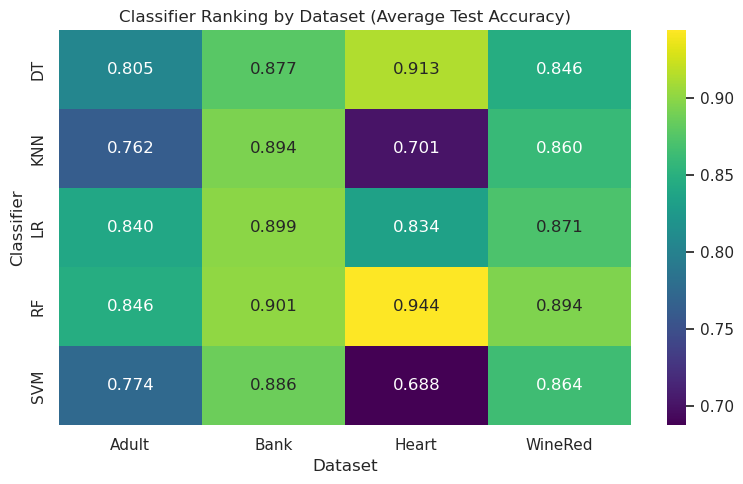

In [24]:
# === Heatmap: Classifier Ranking by Dataset (Test Accuracy) ===

# pivot: rows = classifier, columns = dataset, values = mean TestAcc across splits
heat_acc = (
    three_trial_df
    .groupby(["Classifier", "Dataset"])["TestAcc_mean"]
    .mean()
    .unstack("Dataset")
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    heat_acc,
    annot=True,
    fmt=".3f",
    cmap="viridis"
)
plt.title("Classifier Ranking by Dataset (Average Test Accuracy)")
plt.xlabel("Dataset")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()


### Train Size vs. Accuracy Curve (20/80, 50/50, 80/20)

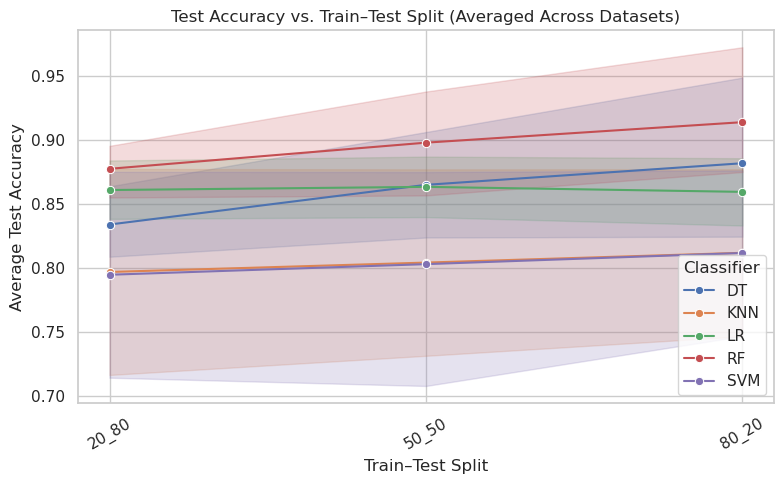

In [25]:
# === Line Plot: Effect of Train Size on Test Accuracy ===

# average over the 3 trials for each (Dataset, Split, Classifier)
acc_by_split = (
    three_trial_df
    .groupby(["Dataset", "Split", "Classifier"])["TestAcc_mean"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=acc_by_split,
    x="Split",
    y="TestAcc_mean",
    hue="Classifier",
    marker="o"
)
plt.title("Test Accuracy vs. Train–Test Split (Averaged Across Datasets)")
plt.xlabel("Train–Test Split")
plt.ylabel("Average Test Accuracy")
plt.legend(title="Classifier")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Test Accuracy with Error Bars (stability across trials)

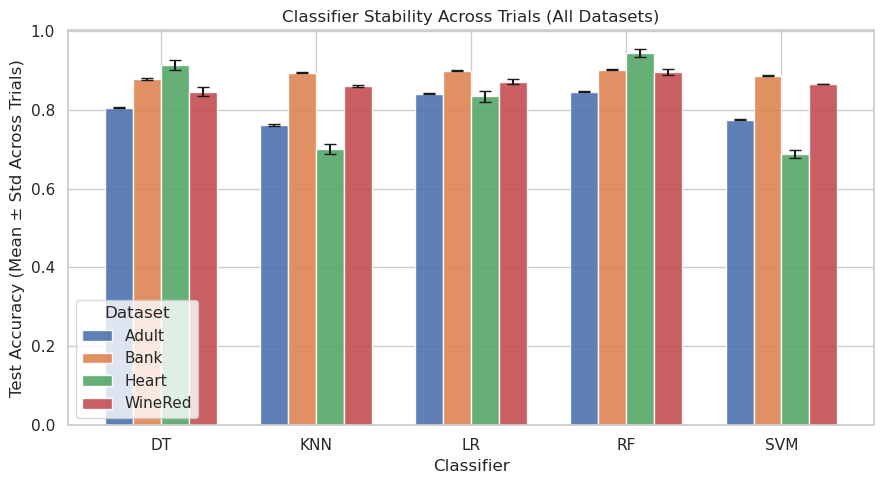

In [26]:
# === Bar Chart with Error Bars: Test Accuracy + Std Across Trials ===

# Collapse across splits: mean and std of test accuracy for each classifier & dataset
acc_err = (
    three_trial_df
    .groupby(["Classifier", "Dataset"])[["TestAcc_mean", "TestAcc_std"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9, 5))

# Position bars: one group per classifier, clustered by dataset
classifiers_order = sorted(acc_err["Classifier"].unique())
datasets_order = sorted(acc_err["Dataset"].unique())

bar_width = 0.18
x = np.arange(len(classifiers_order))

for i, ds in enumerate(datasets_order):
    sub = acc_err[acc_err["Dataset"] == ds].set_index("Classifier").loc[classifiers_order]
    plt.bar(
        x + i * bar_width,
        sub["TestAcc_mean"],
        yerr=sub["TestAcc_std"],
        width=bar_width,
        capsize=4,
        label=ds,
        alpha=0.9
    )

plt.xticks(x + bar_width * (len(datasets_order) - 1) / 2, classifiers_order)
plt.ylabel("Test Accuracy (Mean ± Std Across Trials)")
plt.xlabel("Classifier")
plt.title("Classifier Stability Across Trials (All Datasets)")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


### Dataset Difficulty Bar Chart

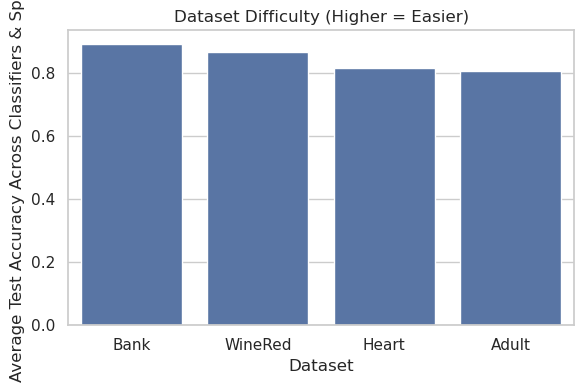

In [28]:
# === Dataset Difficulty: Average Test Accuracy Across Classifiers & Splits ===

dataset_difficulty = (
    three_trial_df
    .groupby("Dataset")["TestAcc_mean"]
    .mean()
    .reset_index()
    .sort_values("TestAcc_mean", ascending=False)
)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=dataset_difficulty,
    x="Dataset",
    y="TestAcc_mean"
)
plt.title("Dataset Difficulty (Higher = Easier)")
plt.xlabel("Dataset")
plt.ylabel("Average Test Accuracy Across Classifiers & Splits")
plt.tight_layout()
plt.show()


### Cross-Validated vs. Test Accuracy Scatterplot

In [30]:
cv_results_df = pd.read_csv("cv_results.csv")

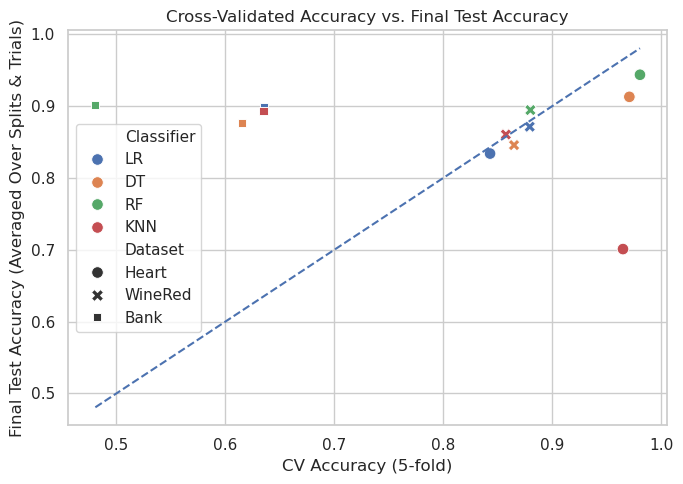

In [31]:
# === Scatter: Cross-Validated Accuracy vs. Final Test Accuracy ===

# average test accuracy across splits & trials for each dataset/classifier
test_acc_summary = (
    three_trial_df
    .groupby(["Dataset", "Classifier"])["TestAcc_mean"]
    .mean()
    .reset_index()
    .rename(columns={"TestAcc_mean": "Final_TestAcc"})
)

# join CV accuracy with final test accuracy
cv_vs_test = cv_results_df.merge(
    test_acc_summary,
    on=["Dataset", "Classifier"],
    how="inner"
)

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=cv_vs_test,
    x="CV_Accuracy",
    y="Final_TestAcc",
    hue="Classifier",
    style="Dataset",
    s=70
)

# diagonal reference line
min_val = min(cv_vs_test["CV_Accuracy"].min(), cv_vs_test["Final_TestAcc"].min())
max_val = max(cv_vs_test["CV_Accuracy"].max(), cv_vs_test["Final_TestAcc"].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")

plt.title("Cross-Validated Accuracy vs. Final Test Accuracy")
plt.xlabel("CV Accuracy (5-fold)")
plt.ylabel("Final Test Accuracy (Averaged Over Splits & Trials)")
plt.tight_layout()
plt.show()

In [ ]:
### Summary of Error

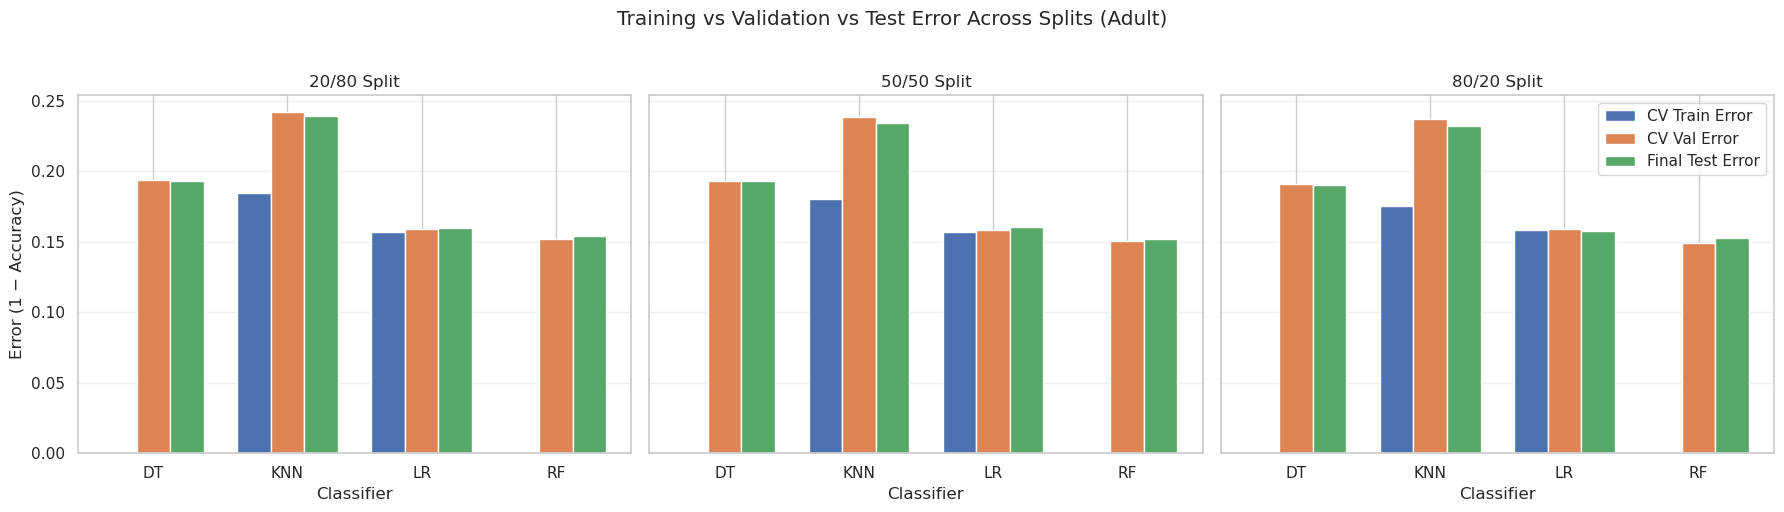

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("summary_train_val_test_errors.csv")

DATASET = "Adult"                 # change: Adult / Bank / Heart / WineRed
splits = ["20_80", "50_50", "80_20"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, split in zip(axes, splits):
    d = df[(df["Dataset"] == DATASET) & (df["Split"] == split)].copy()
    d = d.sort_values("Classifier")

    x = np.arange(len(d))
    width = 0.25

    ax.bar(x - width, d["CV_TrainErr_mean"], width, label="CV Train Error")
    ax.bar(x,         d["CV_ValErr_mean"],   width, label="CV Val Error")
    ax.bar(x + width, d["TestErr_mean"],     width, label="Final Test Error")

    ax.set_xticks(x)
    ax.set_xticklabels(d["Classifier"], rotation=0)
    ax.set_title(f"{split.replace('_','/')} Split")
    ax.set_xlabel("Classifier")
    ax.grid(axis="y", alpha=0.3)

axes[0].set_ylabel("Error (1 − Accuracy)")
fig.suptitle(f"Training vs Validation vs Test Error Across Splits ({DATASET})", y=1.02)
axes[-1].legend(loc="upper right")
plt.tight_layout()
plt.show()


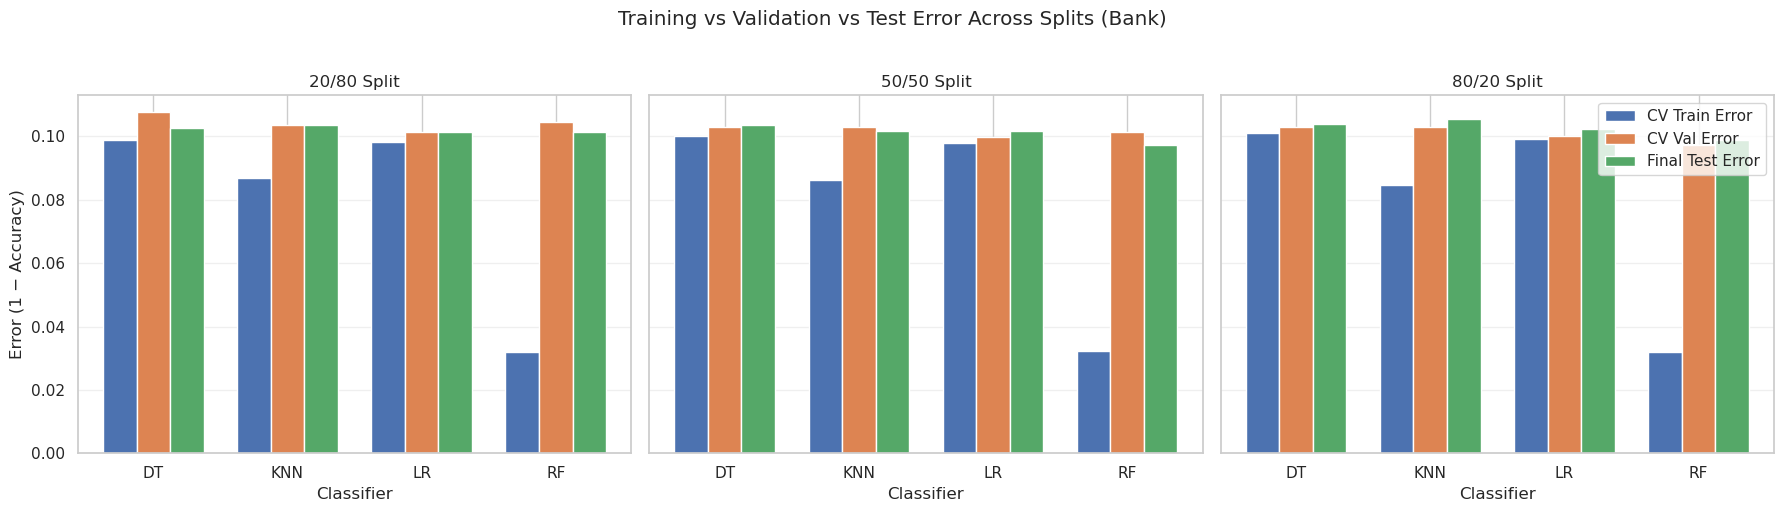

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("summary_train_val_test_errors.csv")

DATASET = "Bank"                 # change: Adult / Bank / Heart / WineRed
splits = ["20_80", "50_50", "80_20"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, split in zip(axes, splits):
    d = df[(df["Dataset"] == DATASET) & (df["Split"] == split)].copy()
    d = d.sort_values("Classifier")

    x = np.arange(len(d))
    width = 0.25

    ax.bar(x - width, d["CV_TrainErr_mean"], width, label="CV Train Error")
    ax.bar(x,         d["CV_ValErr_mean"],   width, label="CV Val Error")
    ax.bar(x + width, d["TestErr_mean"],     width, label="Final Test Error")

    ax.set_xticks(x)
    ax.set_xticklabels(d["Classifier"], rotation=0)
    ax.set_title(f"{split.replace('_','/')} Split")
    ax.set_xlabel("Classifier")
    ax.grid(axis="y", alpha=0.3)

axes[0].set_ylabel("Error (1 − Accuracy)")
fig.suptitle(f"Training vs Validation vs Test Error Across Splits ({DATASET})", y=1.02)
axes[-1].legend(loc="upper right")
plt.tight_layout()
plt.show()

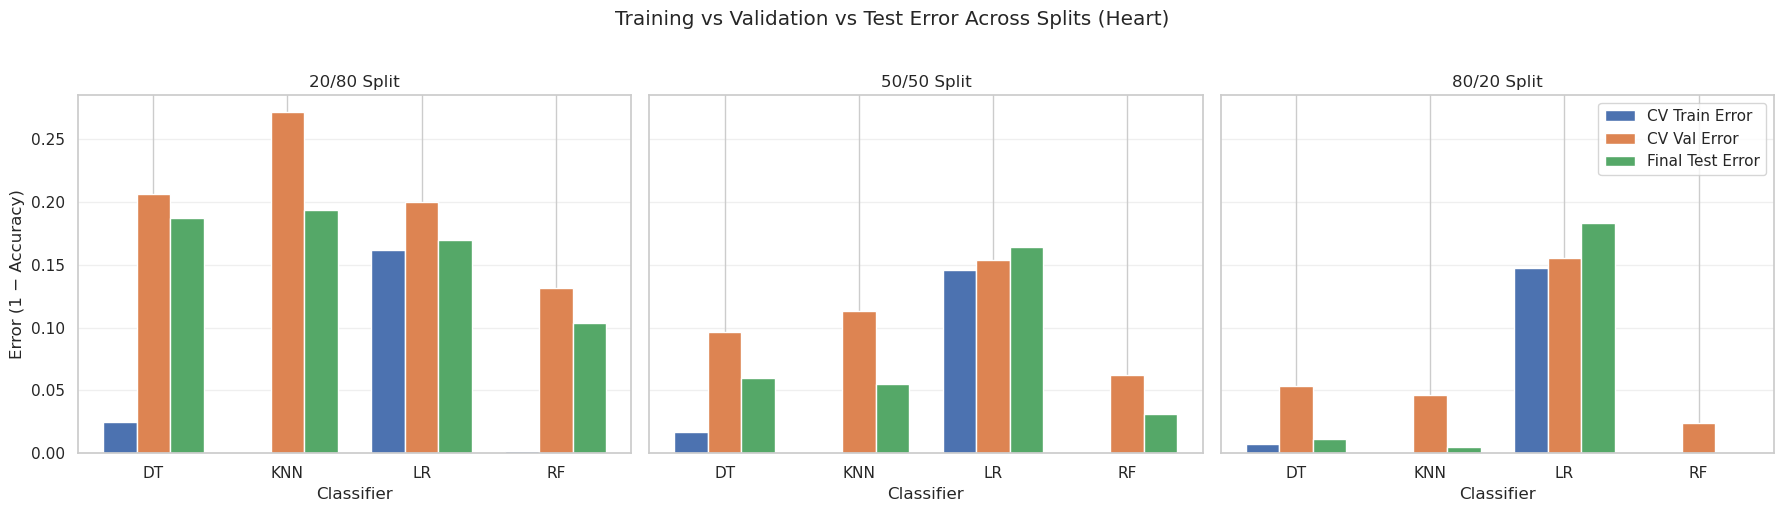

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("summary_train_val_test_errors.csv")

DATASET = "Heart"                 # change: Adult / Bank / Heart / WineRed
splits = ["20_80", "50_50", "80_20"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, split in zip(axes, splits):
    d = df[(df["Dataset"] == DATASET) & (df["Split"] == split)].copy()
    d = d.sort_values("Classifier")

    x = np.arange(len(d))
    width = 0.25

    ax.bar(x - width, d["CV_TrainErr_mean"], width, label="CV Train Error")
    ax.bar(x,         d["CV_ValErr_mean"],   width, label="CV Val Error")
    ax.bar(x + width, d["TestErr_mean"],     width, label="Final Test Error")

    ax.set_xticks(x)
    ax.set_xticklabels(d["Classifier"], rotation=0)
    ax.set_title(f"{split.replace('_','/')} Split")
    ax.set_xlabel("Classifier")
    ax.grid(axis="y", alpha=0.3)

axes[0].set_ylabel("Error (1 − Accuracy)")
fig.suptitle(f"Training vs Validation vs Test Error Across Splits ({DATASET})", y=1.02)
axes[-1].legend(loc="upper right")
plt.tight_layout()
plt.show()

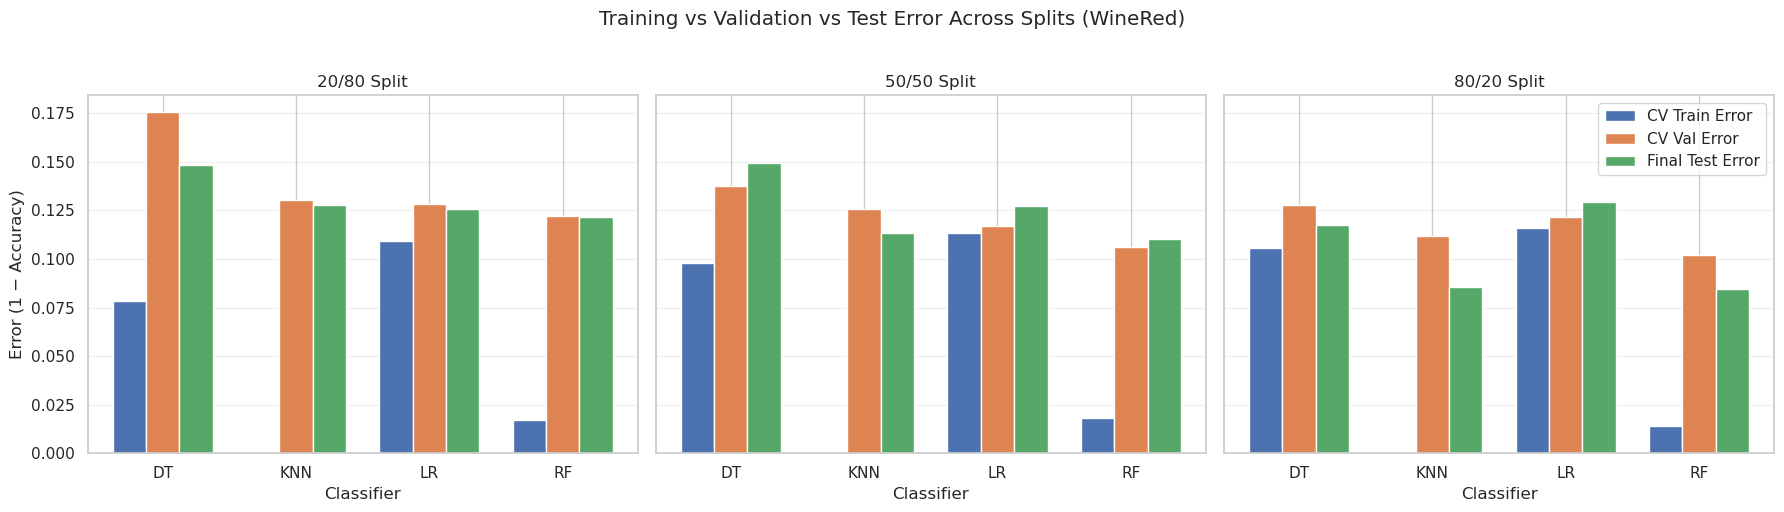

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("summary_train_val_test_errors.csv")

DATASET = "WineRed"                 # change: Adult / Bank / Heart / WineRed
splits = ["20_80", "50_50", "80_20"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, split in zip(axes, splits):
    d = df[(df["Dataset"] == DATASET) & (df["Split"] == split)].copy()
    d = d.sort_values("Classifier")

    x = np.arange(len(d))
    width = 0.25

    ax.bar(x - width, d["CV_TrainErr_mean"], width, label="CV Train Error")
    ax.bar(x,         d["CV_ValErr_mean"],   width, label="CV Val Error")
    ax.bar(x + width, d["TestErr_mean"],     width, label="Final Test Error")

    ax.set_xticks(x)
    ax.set_xticklabels(d["Classifier"], rotation=0)
    ax.set_title(f"{split.replace('_','/')} Split")
    ax.set_xlabel("Classifier")
    ax.grid(axis="y", alpha=0.3)

axes[0].set_ylabel("Error (1 − Accuracy)")
fig.suptitle(f"Training vs Validation vs Test Error Across Splits ({DATASET})", y=1.02)
axes[-1].legend(loc="upper right")
plt.tight_layout()
plt.show()

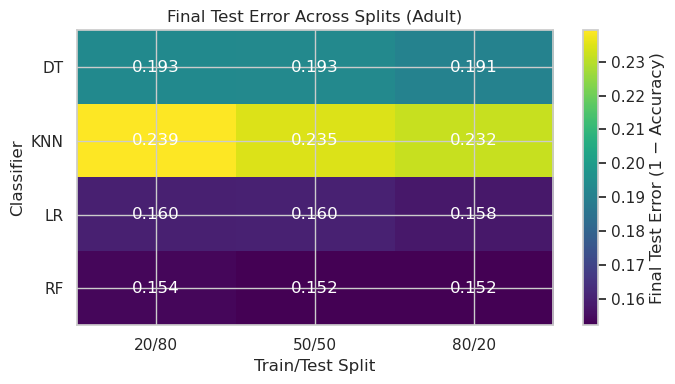

In [37]:
plt.figure(figsize=(7, 4))
plt.imshow(
    heat.values,
    aspect="auto",
    cmap="viridis",
    vmin=heat.values.min(),
    vmax=heat.values.max()
)

plt.xticks(range(len(heat.columns)), [c.replace("_", "/") for c in heat.columns])
plt.yticks(range(len(heat.index)), heat.index)

plt.colorbar(label="Final Test Error (1 − Accuracy)")
plt.title(f"Final Test Error Across Splits ({DATASET})")
plt.xlabel("Train/Test Split")
plt.ylabel("Classifier")

# annotate cells
for i in range(heat.shape[0]):
    for j in range(heat.shape[1]):
        plt.text(j, i, f"{heat.values[i, j]:.3f}",
                 ha="center", va="center", color="white")

plt.tight_layout()
plt.show()
